In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

In [63]:
df = pd.read_excel('weight_price.xlsx',  sheet_name='Sheet1')
df.head()

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [64]:
x = df['weight']
y = df['price']

x.head()

0    2
1    4
2    5
3    3
4    6
Name: weight, dtype: int64

In [65]:
y.head()

0    35
1    60
2    20
3    50
4    50
Name: price, dtype: int64

In [66]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [67]:
xy = np.mean(x * y)
m = ((mean_x * mean_y) - xy) / ((mean_x ** 2) - np.mean(x ** 2))
m

2.620967741935483

In [68]:
c = mean_y - m * mean_x
c

35.161290322580655

In [69]:
dev_x = x - mean_x
dev_y = y - mean_y

dev_x.head()

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
Name: weight, dtype: float64

In [70]:
dev_y.head()

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
Name: price, dtype: float64

In [71]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x ** 2)
m

2.620967741935484

In [72]:
c = mean_y - m * mean_x
c

35.16129032258065

In [73]:
print(f"Slope (m) = {m}")
print(f"Intercept (c) = {c}")
reg = LinearRegression()

reg.fit(df[['weight']], y)

print(reg.coef_)
reg.intercept_

Slope (m) = 2.620967741935484
Intercept (c) = 35.16129032258065
[2.62096774]


35.16129032258065

In [74]:
v_weight = float(input('Enter vegetable weight: '))
predict_price = m * v_weight + c

predict_price

50.88709677419355

In [75]:
reg = LinearRegression()

reg.fit(df[['weight']], y)

reg.coef_

array([2.62096774])

In [76]:
# reg.intercept_

In [77]:
reg.predict([[6]])

array([50.88709677])

In [85]:
x_reshaped = x.reshape(-1, 1)
predictions = reg.predict(x_reshaped)
predictions

array([40.40322581, 45.64516129, 48.26612903, 43.02419355, 50.88709677,
       48.26612903, 53.50806452])

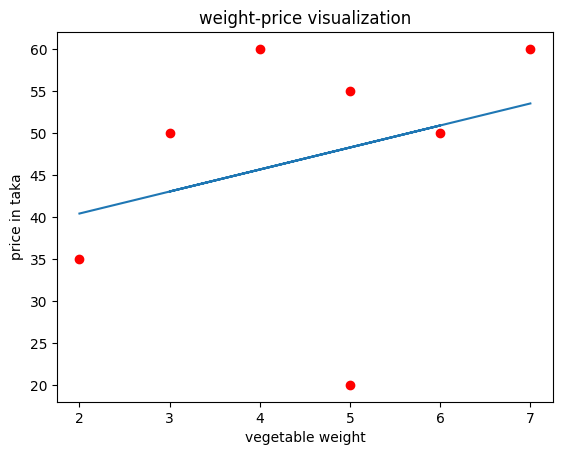

In [87]:
plt.scatter(x, y, color='red')
plt.xlabel('vegetable weight')
plt.ylabel('price in taka')
plt.title('weight-price visualization')
plt.plot(x, predictions)
